# **Installing & Importing Libraries**

In [14]:
# TensorFlow, NumPy, Matplotlib are built into Colab — no installation needed.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# **Tensor Basics (Scalar, Vector, Matrix)**

In [15]:
# A Scalar is a single number (0-D tensor)
scalar = tf.constant(42)
print("Scalar:", scalar)
print("Scalar shape:", scalar.shape)   # () = no dimensions

# A Vector is a 1-D tensor (a list of numbers)
vector = tf.constant([10, 20, 30, 40])
print("\nVector:", vector)
print("Vector shape:", vector.shape)   # (4,) = one dimension of size 4

# A Matrix is a 2-D tensor (rows x columns)
matrix = tf.constant([[2., 4., 6.],
                      [8., 10., 12.]], dtype=tf.float32)

print("\nMatrix:\n", matrix)
print("Matrix shape:", matrix.shape)   # (2,3) = 2 rows, 3 columns

# Tensor Arithmetic (elementwise operations)
matrix_times_3 = matrix * 3
matrix_div_2   = matrix / 2.0

print("\nMatrix * 3:\n", matrix_times_3)
print("\nMatrix / 2:\n", matrix_div_2)

Scalar: tf.Tensor(42, shape=(), dtype=int32)
Scalar shape: ()

Vector: tf.Tensor([10 20 30 40], shape=(4,), dtype=int32)
Vector shape: (4,)

Matrix:
 tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]], shape=(2, 3), dtype=float32)
Matrix shape: (2, 3)

Matrix * 3:
 tf.Tensor(
[[ 6. 12. 18.]
 [24. 30. 36.]], shape=(2, 3), dtype=float32)

Matrix / 2:
 tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


# **Broadcasting**

In [16]:
# BROADCASTING — AUTOMATIC SHAPE EXPANSION

# A is shape (2,3)
A = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])
# B is shape (2,1)
B = tf.constant([[10.],
                 [20.]])

print("A shape:", A.shape)
print("B shape:", B.shape)

# Broadcasting automatically expands B → (2,3)
C = A + B
print("\nBroadcasted A + B:\n", C)


A shape: (2, 3)
B shape: (2, 1)

Broadcasted A + B:
 tf.Tensor(
[[11. 12. 13.]
 [24. 25. 26.]], shape=(2, 3), dtype=float32)


# **GradientTape (shows how deep learning computes gradients)**

In [17]:
# GRADIENT EXAMPLE USING GradientTape

# x is a variable because we want to compute gradients w.r.t x
x = tf.Variable([[2., 3.],
                 [4., 5.]])

# We use GradientTape to "record" operations so TF can compute derivative
with tf.GradientTape() as tape:
    y = tf.reduce_sum(x**3)   # y = sum(x^3)

dy_dx = tape.gradient(y, x)

print("x:\n", x.numpy())
print("\nGradient dy/dx (should be 3x^2):\n", dy_dx.numpy())


x:
 [[2. 3.]
 [4. 5.]]

Gradient dy/dx (should be 3x^2):
 [[12. 27.]
 [48. 75.]]


# **Importing a different dataset from Keras and constructing a model similar to the one that is in the given pdf notebook.**

In [18]:
# LOAD Fashion-MNIST DATASET

# Load Fashion-MNIST instead of MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (0 to 1 range)
x_train = x_train.astype("float32") / 255.
x_test  = x_test.astype("float32") / 255.

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


# **Building a Functional API Model (Flatten → Dense → Dense → Dense → Output)**

In [19]:
# BUILD KERAS FUNCTIONAL API MODEL

inputs = keras.Input(shape=(28, 28), name="input_layer")

# Flatten converts 28×28 → 784
x = layers.Flatten()(inputs)

# First dense layer with ReLU
x = layers.Dense(256, activation="relu")(x)

# Second dense layer with Tanh
x = layers.Dense(128, activation="tanh")(x)

# Third dense layer with SELU
x = layers.Dense(64, activation="selu")(x)

# Output layer: 10 classes with Softmax
outputs = layers.Dense(10, activation="softmax")(x)

# Build model
model = keras.Model(inputs, outputs, name="fashion_mnist_model")

model.summary()


Model: "fashion_mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

# **Compiling Using Different Optimizers**

In [20]:
# SGD can be replaced with RMSprop, Adam, Nadam, etc.
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


# **Training Model & Computing Metrics**

In [21]:
# TRAIN THE MODEL

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6661 - loss: 1.0587 - val_accuracy: 0.7991 - val_loss: 0.5626
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8217 - loss: 0.5170 - val_accuracy: 0.8308 - val_loss: 0.4780
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8350 - loss: 0.4661 - val_accuracy: 0.8275 - val_loss: 0.4693
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8499 - loss: 0.4261 - val_accuracy: 0.8487 - val_loss: 0.4239
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8607 - loss: 0.4005 - val_accuracy: 0.8523 - val_loss: 0.4059


# **Plot Accuracy**

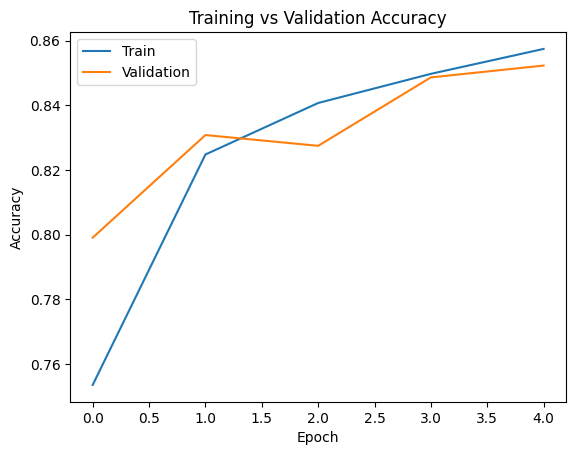

In [22]:
# PLOT TRAINING & VALIDATION ACCURACY

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


# **Computing F1, Precision, Recall, AUC ROC**

In [23]:
# PREDICTIONS & CLASSIFICATION METRICS


# Predict class probabilities
y_pred_proba = model.predict(x_test)

# Convert probabilities → class labels (argmax)
y_pred = y_pred_proba.argmax(axis=1)

# Compute metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec  = recall_score(y_test, y_pred, average='macro')
f1   = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 0.8444
Precision: 0.8459280555293892
Recall: 0.8443999999999999
F1 Score: 0.8449241653229072


# **Ploting AUC-ROC Curve (Multiclass)**

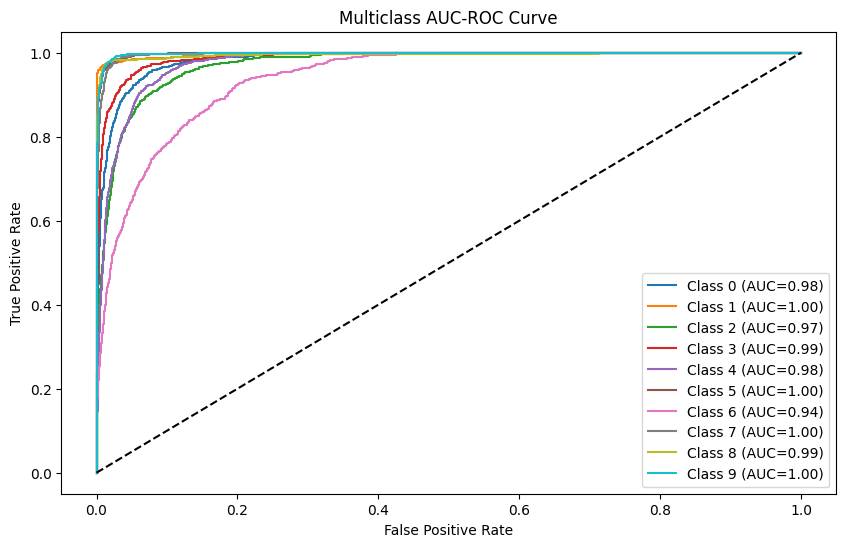

In [25]:
# MULTICLASS AUC-ROC CURVE

# Convert y_test to binary format for multiclass ROC
y_test_bin = label_binarize(y_test, classes=range(10))

plt.figure(figsize=(10, 6))

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={roc_auc:.2f})")

# Plot diagonal line
plt.plot([0,1], [0,1], 'k--')

plt.title("Multiclass AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# **Matrix Multiplication & Division**

In [26]:
A = tf.constant([[2., 4.],
                 [6., 8.]])

B = tf.constant([[1., 2.],
                 [3., 4.]])

# Elementwise operations
print("A * B:\n", A * B)
print("\nA / B:\n", A / B)

# True matrix multiplication (dot product)
print("\nA @ B:\n", A @ B)


A * B:
 tf.Tensor(
[[ 2.  8.]
 [18. 32.]], shape=(2, 2), dtype=float32)

A / B:
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)

A @ B:
 tf.Tensor(
[[14. 20.]
 [30. 44.]], shape=(2, 2), dtype=float32)
